# Submission Project ML Intermediate 1
- Nama : Ferdy Rizkiawan
- Email : ferdyrizkiawan@student.uns.ac.id
- ID Dicoding : ferdyrizz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
category = pd.get_dummies(df.category)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='category')
new_df.head()

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0


In [ ]:
new_df['text'] = df['text'].str.lower()

stop_word = set(stopwords.words('english'))

new_df['text'] = new_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

new_df['text'] = new_df['text'].apply(lemmatize_text)

In [ ]:
text = new_df['text'].values
label = new_df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=13000, oov_token='<oov>')
tokenizer.fit_on_texts(text_train)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequence_train,
                             padding='post',
                             maxlen=100,
                             truncating='post')
padded_test = pad_sequences(sequence_test,
                            padding='post',
                            maxlen=100,
                            truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=13000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True

callbacks = myCallback()

hist = model.fit(
    padded_train,
    label_train,
    batch_size=128,
    epochs=100,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/100
14/14 - 14s - loss: 1.6061 - accuracy: 0.2382 - val_loss: 1.6047 - val_accuracy: 0.2404 - 14s/epoch - 997ms/step
Epoch 2/100
14/14 - 6s - loss: 1.5914 - accuracy: 0.2522 - val_loss: 1.5882 - val_accuracy: 0.2472 - 6s/epoch - 415ms/step
Epoch 3/100
14/14 - 4s - loss: 1.4644 - accuracy: 0.3730 - val_loss: 1.2674 - val_accuracy: 0.3955 - 4s/epoch - 262ms/step
Epoch 4/100
14/14 - 4s - loss: 1.1941 - accuracy: 0.4298 - val_loss: 1.1809 - val_accuracy: 0.4247 - 4s/epoch - 281ms/step
Epoch 5/100
14/14 - 5s - loss: 1.1252 - accuracy: 0.4618 - val_loss: 1.1377 - val_accuracy: 0.4360 - 5s/epoch - 358ms/step
Epoch 6/100
14/14 - 4s - loss: 1.1061 - accuracy: 0.4438 - val_loss: 1.1380 - val_accuracy: 0.4742 - 4s/epoch - 261ms/step
Epoch 7/100
14/14 - 4s - loss: 1.0878 - accuracy: 0.4713 - val_loss: 1.1268 - val_accuracy: 0.4607 - 4s/epoch - 287ms/step
Epoch 8/100
14/14 - 7s - loss: 1.0646 - accuracy: 0.4770 - val_loss: 1.0833 - val_accuracy: 0.5236 - 7s/epoch - 471ms/step
Epoch 9/100
14

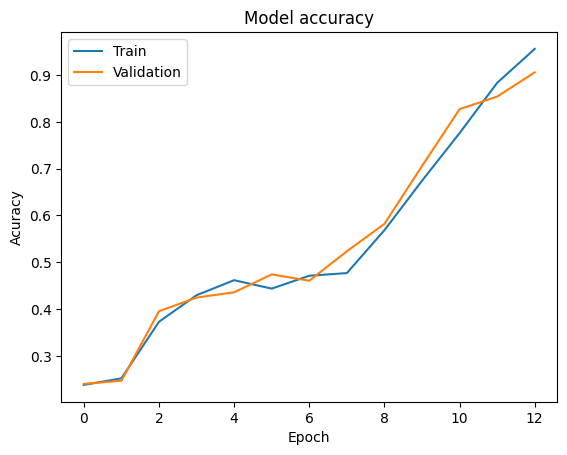

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Acuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

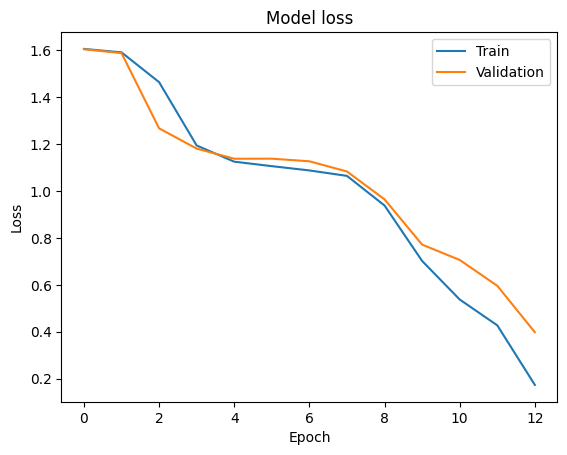

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()